In [1]:
import pandas as pd
import numpy as np

In [2]:
df_train = pd.read_csv("D:\\datapool\\cs-training.csv")

x = df_train.drop([u'Unnamed: 0', u'SeriousDlqin2yrs'] , axis = 1)
y_column = u'SeriousDlqin2yrs'
y = df_train[u'SeriousDlqin2yrs']

In [3]:
x["test_cat1"] = pd.Series(np.random.randint(0,5,size=150000)).apply(lambda x:str(x)+"_test")
x["test_cat2"] = pd.Series(np.random.randint(0,10,size=150000)).apply(lambda x:str(x)+"_test")
x["test_cat3"] = pd.Series(np.random.randint(0,20,size=150000)).apply(lambda x:str(x)+"_test")
x["test_U"] = y
x.loc[x["test_cat1"] == "0_test","test_cat1"] = np.nan
x.loc[x["test_cat2"] == "0_test","test_cat2"] = np.nan
x.loc[x["test_cat3"] == "0_test","test_cat3"] = np.nan

#x["test_cat1"].value_counts()

#print np.random.randint.__doc__

In [5]:
%run D:\gitstore\fy_scorecard.py

ximu = fs_scorecard(x,y,event = 1,workpath = "./")

#ximu.get_woe_iv()

ximu.columns_bin_dict["NumberOfTime30-59DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTime60-89DaysPastDueNotWorse"] = [-np.inf,0,np.inf]
ximu.columns_bin_dict["NumberOfTimes90DaysLate"] = [-np.inf,0,np.inf]

ximu.get_woe_iv()

ximu.woe_t.head()

d:\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


FY Scorecard ready!
test_cat3 : too many values for discrete variables.


<string>:84: RuntimeWarning: divide by zero encountered in log


./woe_t.xlsx  generated;
 <name>.woe_t, <name>.iv_t available


,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,p_yi,woe,iv_i
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",30000,582,29418,0.210168,0.06684,0.058049,-1.286617,0.195718
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",30000,497,29503,0.210775,0.06684,0.049571,-1.447382,0.233323
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",30000,877,29123,0.208060,0.06684,0.087473,-0.866502,0.104489
3,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",30000,2107,27893,0.199273,0.06684,0.210154,0.053164,0.000578
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",30000,5963,24037,0.171725,0.06684,0.594754,1.242254,0.525509


In [6]:
ximu.get_woe_replaced_df()


<name>.df_woe_replaced, <name>.df_binned available


In [7]:
excluded_columns = ["test_U","NumberOfDependents","test_cat1","test_cat2","NumberRealEstateLoansOrLines"]
ximu.genmodel(excluded_columns = excluded_columns)

Optimization terminated successfully.
         Current function value: 0.450286
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149992
Method:                           MLE   Df Model:                            7
Date:                Mon, 18 Sep 2017   Pseudo R-squ.:                 -0.8350
Time:                        09:51:20   Log-Likelihood:                -67543.
converged:                       True   LL-Null:                       -36808.
                                        LLR p-value:                     1.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
DebtRatio                                0.4617      0.0

In [22]:
ximu.model.exog_names

['DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'RevolvingUtilizationOfUnsecuredLines',
 'age']

In [16]:
woe_t2.head()

,var_name,var_cat,cat_total_count,pos_count,neg_count,p_ni,p_y_total,p_yi,woe,iv_i,params,score
0,RevolvingUtilizationOfUnsecuredLines,"(-inf, 0.0192]",30000,582,29418,0.210168,0.06684,0.058049,-1.286617,0.195718,0.556074,20.643647
1,RevolvingUtilizationOfUnsecuredLines,"(0.0192, 0.0832]",30000,497,29503,0.210775,0.06684,0.049571,-1.447382,0.233323,0.556074,23.223118
2,RevolvingUtilizationOfUnsecuredLines,"(0.0832, 0.271]",30000,877,29123,0.208060,0.06684,0.087473,-0.866502,0.104489,0.556074,13.902940
3,RevolvingUtilizationOfUnsecuredLines,"(0.271, 0.699]",30000,2107,27893,0.199273,0.06684,0.210154,0.053164,0.000578,0.556074,-0.853017
4,RevolvingUtilizationOfUnsecuredLines,"(0.699, inf]",30000,5963,24037,0.171725,0.06684,0.594754,1.242254,0.525509,0.556074,-19.931860


In [8]:
base_score = 600
base_rt = 20

y_event = ximu.y_event
base_odds = (y_event.sum()+0.0)/(y_event.count()-y_event.sum())
reverse_base_odds = 1/base_odds

p = base_rt/np.log(2)
q = base_score - base_rt*np.log(reverse_base_odds)/np.log(2)

print "base_odds: ",base_odds
print "reverse_base_odds: ",reverse_base_odds
print "base_rt: ",base_rt
print "base_score: ",base_score
print "p: ",p
print "q: ",q

base_odds:  0.0716275879806
reverse_base_odds:  13.961101137
base_rt:  20
base_score:  600
p:  28.8539008178
q:  523.933183423


In [25]:
#生成df_scored

params = ximu.model_result.params
df_params = params.reset_index().rename(columns={"index":"var_name",0:"params"})

woe_t2 = ximu.woe_t.merge(df_params,on="var_name",how="left")
woe_t2["score"] = - woe_t2["params"] * woe_t2["woe"]*p

#woe_t2 为得分概览
#woe_t = ximu.woe_t
df_scored = pd.DataFrame()


for i in ximu.model.exog_names:
    print i 
    df_score_value = woe_t2[woe_t2["var_name"]==i][["var_cat","score"]]
    df_scored[i] = ximu.df_binned.merge(df_score_value,how="left",left_on=i,right_on="var_cat")["score"]
    
df_scored.head()
df_scored["final_score"] = df_scored.sum(axis = 1)+600
print df_scored["final_score"].describe()
df_scored.head()

DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTime60-89DaysPastDueNotWorse
NumberOfTimes90DaysLate
RevolvingUtilizationOfUnsecuredLines
age
count    150000.000000
mean        628.346269
std          48.764557
min         387.425550
25%         616.710034
50%         644.505749
75%         657.866426
max         672.899208
Name: final_score, dtype: float64


,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate,RevolvingUtilizationOfUnsecuredLines,age,final_score
0,-5.666137,2.872727,0.012023,-22.244111,7.760784,17.018069,-19.931860,-2.202335,577.619159
1,1.301003,-2.283734,-1.645793,9.280536,7.760784,17.018069,-19.931860,-2.202335,609.296671
2,1.301003,-1.872038,-1.645793,-22.244111,7.760784,-100.378763,-0.853017,-4.429185,477.638880
3,1.301003,-1.872038,0.605807,9.280536,7.760784,17.018069,13.902940,-4.429185,643.567916
4,1.301003,2.872727,1.044740,-22.244111,7.760784,17.018069,-19.931860,-0.648725,587.172627


In [28]:

predict_true = pd.DataFrame()
predict_true["true"] = ximu.y_event
predict_true["predict"] = ximu.model_result.fittedvalues
#predict_true["predict"] = df_scored["final_score"]
predict_true.head()


import sklearn.metrics as skmetric

fpr ,tpr ,thresholds = skmetric.roc_curve(predict_true["true"],predict_true["predict"])
auc =  skmetric.auc(fpr, tpr)

In [49]:
#排序性（提升图示例）
import math as mt
df_scored["score_rank"] = (df_scored["final_score"].rank(pct=True,ascending = False)*10).apply(mt.ceil)
df_test = pd.concat([df_scored["score_rank"],y],axis = 1)
df_test_grp = df_test.groupby("score_rank")[y.name].agg([pd.Series.sum,pd.Series.count])
df_test_grp["pos_rt"] = df_test_grp["sum"] / df_test_grp["count"]
df_test_grp

,sum,count,pos_rt
score_rank,,,
1.0,82,14874,0.005513
2.0,96,15143,0.006340
3.0,150,14988,0.010008
4.0,188,14993,0.012539
5.0,282,15012,0.018785
6.0,455,14998,0.030337
7.0,643,14997,0.042875
8.0,1075,14990,0.071714
9.0,1767,15012,0.117706


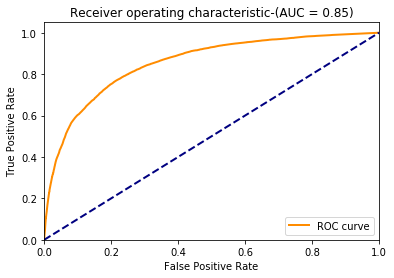

In [62]:
#roc曲线

%matplotlib inline
import matplotlib.pyplot as plt
roc_plot = plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic-(AUC = %0.2f)' % auc)
plt.legend(loc="lower right")
#plt.show()

ks_value:  0.553823892591
ks_position 5.0


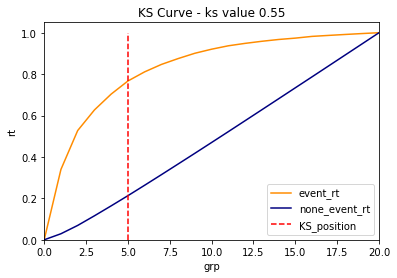

In [58]:
#KS曲线

event_total = y.sum()
non_event_total = y.count() - y.sum()

predict_true["score_rk"] = predict_true["predict"].rank(ascending = False
                                                        ,method = "first")
group_size = round(predict_true.shape[0]/20)
predict_true["rk_group"] = (predict_true["score_rk"]/group_size).apply(np.ceil)

test_grp = predict_true.groupby("rk_group")["true"].agg([np.sum,pd.Series.count])\
            .rename(columns = {"sum":"event_cnt","count":"total_cnt"})\
            .reset_index()
test_grp["non_event_cnt"] = test_grp["total_cnt"] - test_grp["event_cnt"]
test_grp["event_cnt_cum"] = test_grp["event_cnt"].cumsum()
test_grp["non_event_cnt_cum"] = test_grp["non_event_cnt"].cumsum()

test_grp["event_rt"] = test_grp["event_cnt_cum"] / event_total
test_grp["none_event_rt"] = test_grp["non_event_cnt_cum"] / non_event_total

test_grp["ks_value"] = test_grp["event_rt"] - test_grp["none_event_rt"]

ks_value = test_grp["ks_value"].max()
ks_position = test_grp[test_grp["ks_value"]==ks_value]["rk_group"].iloc[0]
print "ks_value: ",ks_value
print "ks_position",ks_position

test_grp_2 = pd.DataFrame({
    "rk_group":[0],
    "event_rt":[0],
    "none_event_rt":[0]}
).append(test_grp)

plt.plot(test_grp_2["rk_group"],test_grp_2["event_rt"],color = "darkorange")
plt.plot(test_grp_2["rk_group"],test_grp_2["none_event_rt"],color = "navy")
plt.plot([ks_position,ks_position],[0,1],color="red",linestyle = "--",
        label = "KS_position")
plt.xlim([0,20])
plt.ylim([0,1.05])
plt.xlabel("grp")
plt.ylabel("rt")
plt.title("KS Curve - ks value %0.2f" % ks_value)
plt.legend(loc = "lower right")